In [1]:
# --- 1. SETUP AND DATA LOADING ---

# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure settings for better visualizations  
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8) # Set a default figure size

# Load the dataset from a public URL
# This ensures the notebook is reproducible without needing to download files
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [2]:
# --- 2. INITIAL DATA INSPECTION ---

# Display the first 5 rows to get a feel for the data's structure
print("--- First 5 Rows ---")
print(df.head())

# Get a concise summary of the DataFrame (data types, non-null counts)
print("\n--- DataFrame Info ---")
df.info()

# Check for any missing values - a critical step in any analysis
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

# Generate descriptive statistics for numerical columns to understand their distribution
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

--- Missing Values Count ---
age         0
sex    

### Initial Findings from Data Inspection

1.  **Structure**: The dataset contains **1338 rows** and **7 columns**.
2.  **Data Quality**: There are **no missing values**, which simplifies the data cleaning process.
3.  **Data Types**: All columns have appropriate data types (`object` for categorical, `int64` and `float64` for numerical).
4.  **Statistical Summary**:
    *   The average `age` is around 39 years.
    *   The average `charges` are **$13,270**, but the standard deviation is very high ($12,110).
    *   The large gap between the mean ($13,270) and the median (50% mark, $9,382) for `charges` suggests a **right-skewed distribution**, likely due to a number of very high-cost claims. This is a key area to investigate.

In [3]:
# --- 3. EXPLORATORY DATA ANALYSIS (EDA) ---

# Section 3.1: Analyzing the Impact of Smoking

# Use groupby to see the statistical differences in charges
smoker_charges_comparison = df.groupby('smoker')['charges'].describe()

print("--- Statistical Comparison of Charges for Smokers vs. Non-Smokers ---")
print(smoker_charges_comparison)

--- Statistical Comparison of Charges for Smokers vs. Non-Smokers ---
         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


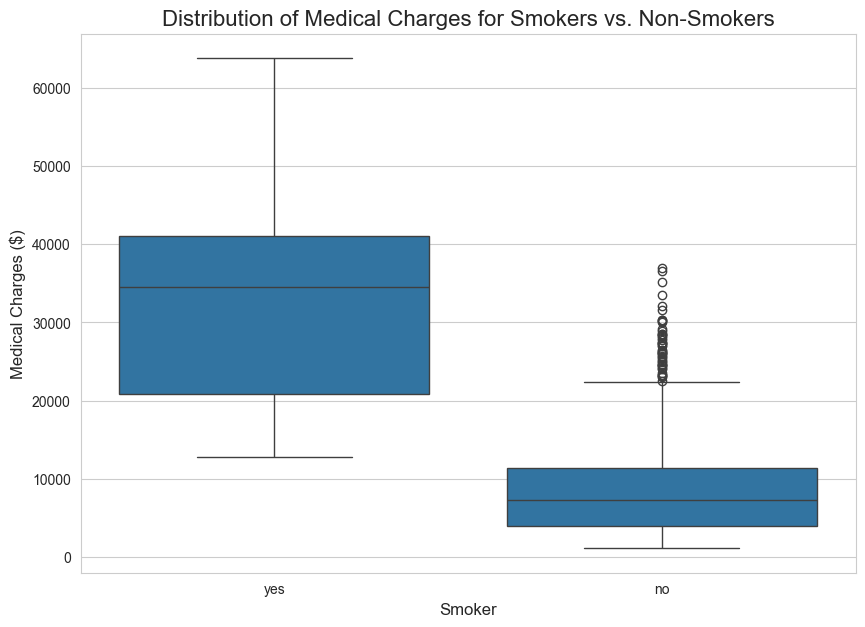

In [4]:
# Create a boxplot to visually compare the charge distributions
plt.figure(figsize=(10, 7))
sns.boxplot(x='smoker', y='charges', data=df)

# Add titles and labels for clarity
plt.title('Distribution of Medical Charges for Smokers vs. Non-Smokers', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Medical Charges ($)', fontsize=12)

# --- SAVE THE PLOT ---
# This saves the generated figure into the 'images' folder for our README
plt.savefig('images/smoker_charges_boxplot.png', bbox_inches='tight')

# Display the plot in the notebook
plt.show()

### Finding 1: Smoking is the Strongest Factor

- **Massive Cost Difference**: The analysis clearly shows that smoking is a major driver of medical costs. The average charge for a smoker (`$32,050`) is nearly **four times higher** than for a non-smoker (`$8,434`).
- **Higher Variability**: The range of medical charges is significantly wider for smokers, indicating a higher risk of extremely expensive treatments.

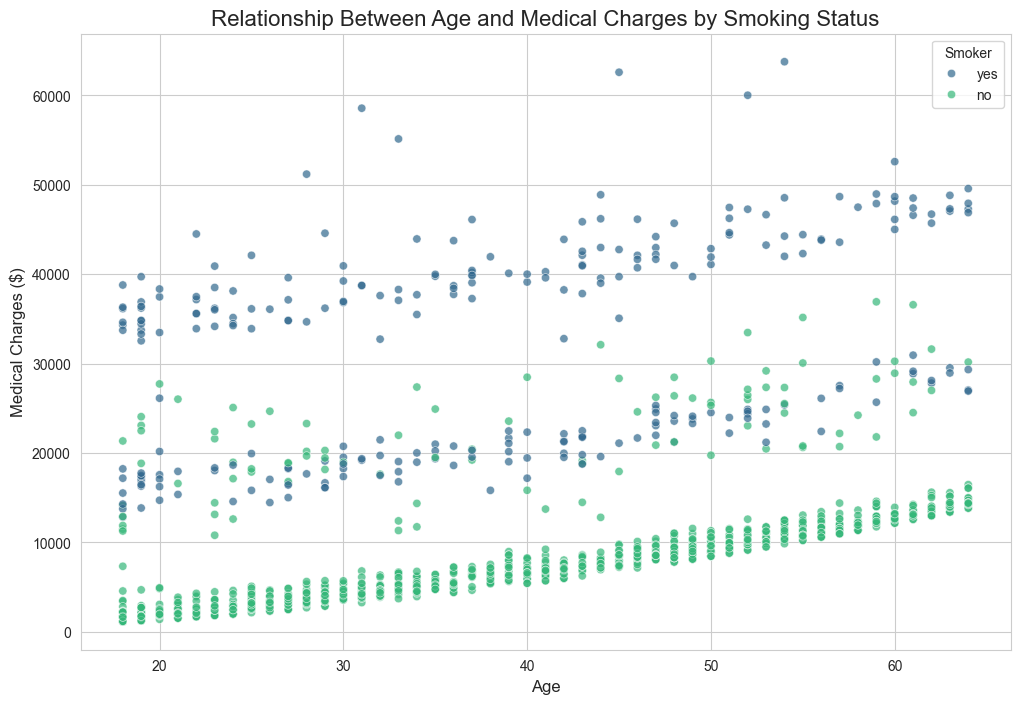

In [5]:
# Section 3.2: Analyzing the Impact of Age

# Create a scatter plot to visualize the relationship between age and charges
# We use 'hue' to see if the relationship is different for smokers and non-smokers
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)

# Add titles and labels for clarity
plt.title('Relationship Between Age and Medical Charges by Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Medical Charges ($)', fontsize=12)
plt.legend(title='Smoker')

# --- SAVE THE PLOT ---
plt.savefig('images/age_charges_scatter.png', bbox_inches='tight')

# Display the plot
plt.show()

### Finding 2: Age Shows a Clear Positive Correlation with Charges

*   **General Upward Trend**: The plot clearly shows that medical charges tend to increase as a person gets older. This is visible for both smokers and non-smokers.
*   **Two Distinct Cost Groups**: The data is split into two primary clusters based on smoking status. For any given age, smokers (**the upper cluster of points**) consistently face significantly higher charges than non-smokers (**the lower cluster of points**).
*   **Potential for Underlying Tiers**: An interesting observation within the non-smoker group is the appearance of three distinct, parallel lines of data points. This suggests there might be other, yet-to-be-identified factors that segment non-smokers into different cost brackets.

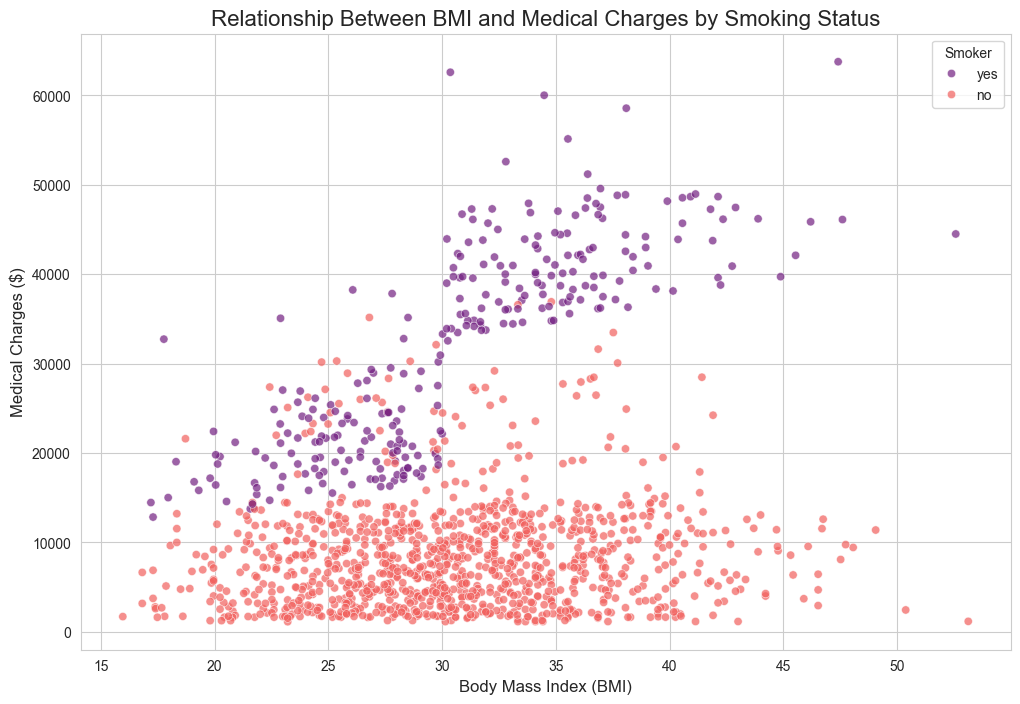

In [6]:
# Section 3.3: Analyzing the Impact of BMI

# Create a scatter plot to visualize the relationship between BMI and charges
# We again use 'hue' to investigate the interaction with smoking status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='magma', alpha=0.7)

# Add titles and labels for clarity
plt.title('Relationship Between BMI and Medical Charges by Smoking Status', fontsize=16)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Medical Charges ($)', fontsize=12)
plt.legend(title='Smoker')

# --- SAVE THE PLOT ---
# This is a critical visualization for the portfolio
plt.savefig('images/bmi_charges_scatter.png', bbox_inches='tight')

# Display the plot
plt.show()

### Finding 3: High BMI is a Critical Factor, but Mostly for Smokers

*   **Powerful Interaction Effect**: The impact of BMI on medical charges is dramatically different for smokers and non-smokers. This is the clearest example of an interaction effect in the dataset.
*   **Non-Smokers**: For non-smokers (**the lower, denser cluster of points**), there is a very weak positive correlation between BMI and charges. Even at high BMI levels, costs do not rise significantly.
*   **Smokers**: For smokers, a clear threshold appears around a BMI of 30. Smokers with a BMI **above this line** face exponentially higher medical charges, forming a steep upward trend. This reveals that the combination of **smoking and obesity** is the strongest driver of the highest costs in this dataset.

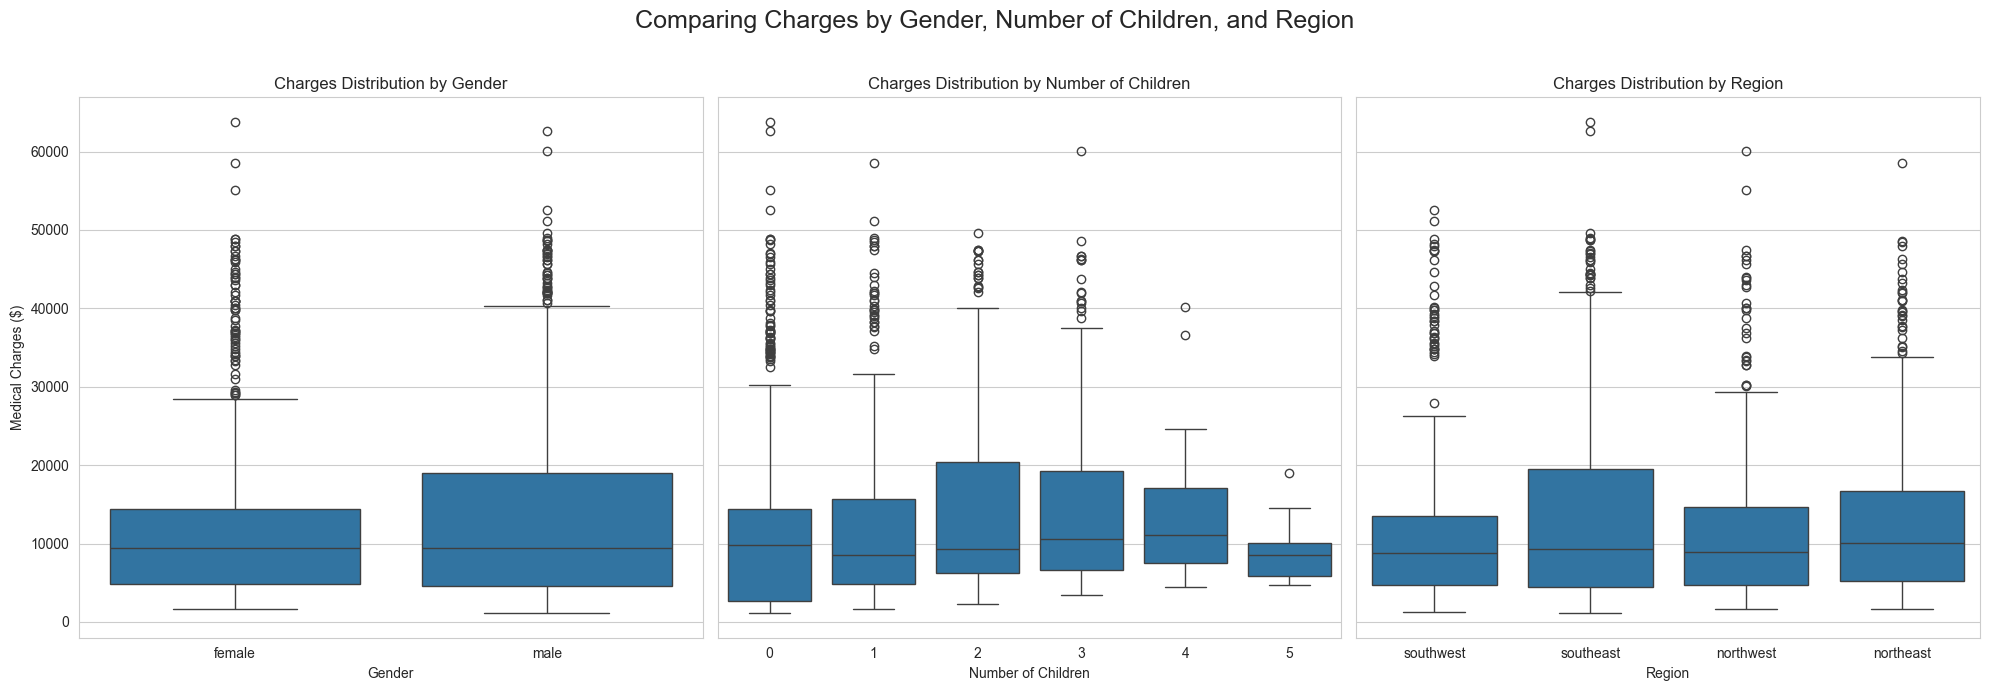

In [7]:
# Section 3.4: Analysis of Remaining Categorical Variables

# Create a figure with 3 subplots to analyze the remaining variables side-by-side
# We use sharey=True so that the y-axis (charges) is consistent and comparable across all plots
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
fig.suptitle('Comparing Charges by Gender, Number of Children, and Region', fontsize=18)

# --- Subplot 1: Gender (sex) ---
sns.boxplot(ax=axes[0], x='sex', y='charges', data=df)
axes[0].set_title('Charges Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Medical Charges ($)')

# --- Subplot 2: Number of Children ---
sns.boxplot(ax=axes[1], x='children', y='charges', data=df)
axes[1].set_title('Charges Distribution by Number of Children')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('') # Hide y-label as it's shared

# --- Subplot 3: Region ---
sns.boxplot(ax=axes[2], x='region', y='charges', data=df)
axes[2].set_title('Charges Distribution by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('') # Hide y-label as it's shared

# Adjust layout to make space for the main title and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Finding 4: Other Variables Show Little to No Significant Impact

An analysis of the remaining variables confirms that they are not the primary drivers of medical charges.

*   **Gender (`sex`)**: The distributions of charges for males and females are nearly identical. This suggests that gender has a negligible impact on medical costs in this dataset.
*   **Number of Children (`children`)**: There is no discernible trend or significant difference in charges based on the number of children. The median costs remain similar across all groups.
*   **Region**: All four geographical regions show very similar distributions for medical charges, indicating that a beneficiary's location is not a key factor in their insurance costs.

**Conclusion from EDA**: This comprehensive exploratory analysis confirms that the most powerful predictors of high medical costs are **smoking**, **age**, and the **interaction between smoking and a high BMI**.

# --- 4. Project Summary & Final Conclusions ---

This exploratory data analysis aimed to identify the key drivers of medical insurance costs. After a thorough investigation of all variables, we have arrived at several key conclusions.

### Key Findings Summarized:

1.  **Smoking is the Dominant Factor**: The single most powerful predictor of high medical costs is smoking. On average, smokers face charges that are nearly **four times higher** than those of non-smokers.

2.  **Age Shows a Clear Positive Correlation**: Medical costs consistently increase with age. This trend is present for both smokers and non-smokers.

3.  **The Interaction of Smoking and High BMI is Critical**: While a high BMI (>30) has a modest impact on costs for non-smokers, it has an explosive effect for smokers. The combination of smoking and obesity creates the highest-risk, highest-cost group of individuals in this dataset.

4.  **Other Factors are Negligible**: Variables such as gender, number of children, and geographic region showed no significant, consistent impact on medical charges.

### Final Conclusion:

The profile of a client with the highest expected medical charges is an **older individual who smokes and has a BMI of 30 or higher**. While age is a steady, predictable factor, the combination of smoking and obesity acts as a powerful multiplier, drastically increasing costs. This analysis provides a clear basis for risk assessment and highlights the importance of lifestyle factors in determining healthcare expenses.

### Potential Next Steps:

This exploratory analysis serves as a solid foundation for a predictive modeling project. Potential next steps could include:

*   **Building a Predictive Model**: Develop a machine learning model (e.g., Linear Regression, Gradient Boosting) to predict a user's medical charges based on their attributes.
*   **Feature Engineering**: Create new features to improve model accuracy, such as a binary `is_obese` column or interaction terms (e.g., `age * bmi`).
*   **Statistical Testing**: Perform formal statistical tests (like t-tests or ANOVA) to mathematically confirm the significance of the observed differences between groups.

---
Thank you for reviewing this analysis!